    Loan_ID Gender Married Dependents     Education Self_Employed  \
0  LP001002   Male      No          0      Graduate            No   
1  LP001003   Male     Yes          1      Graduate            No   
2  LP001005   Male     Yes          0      Graduate           Yes   
3  LP001006   Male     Yes          0  Not Graduate            No   
4  LP001008   Male      No          0      Graduate            No   

   ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
0             5849                0.0         NaN             360.0   
1             4583             1508.0       128.0             360.0   
2             3000                0.0        66.0             360.0   
3             2583             2358.0       120.0             360.0   
4             6000                0.0       141.0             360.0   

   Credit_History Property_Area Loan_Status  
0             1.0         Urban           Y  
1             1.0         Rural           N  
2             1.0   

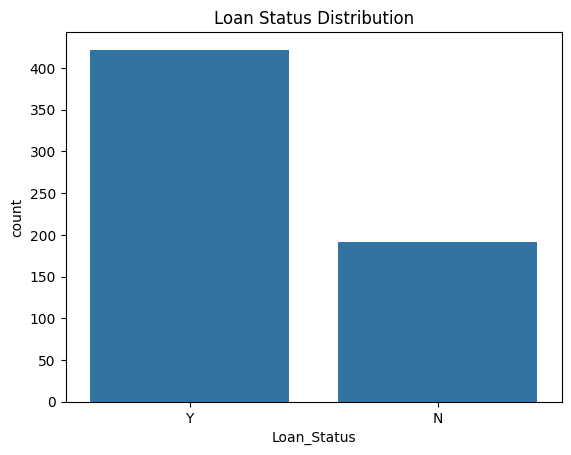

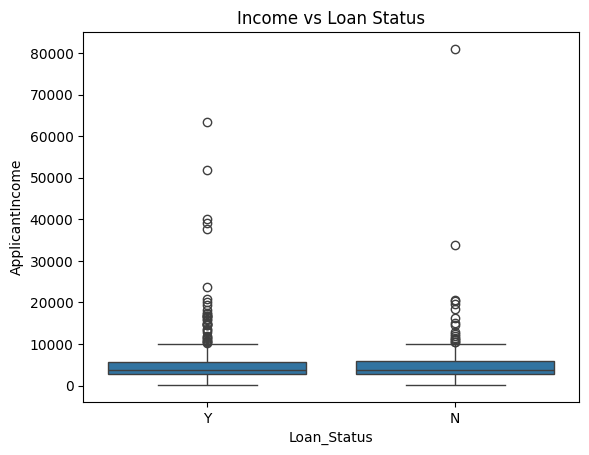

In [4]:
# 📦 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error, r2_score

# 📂 2. Load the Data
train = pd.read_csv('train_ctrUa4K.csv')
test = pd.read_csv('test_lAUu6dG.csv')

# 👁️ 3. Explore the Data
print(train.head())
print(train.describe())
print(train.info())

# 🔍 Plotting
sns.countplot(x='Loan_Status', data=train)
plt.title("Loan Status Distribution")
plt.show()

sns.boxplot(x='Loan_Status', y='ApplicantIncome', data=train)
plt.title("Income vs Loan Status")
plt.show()


Data Cleaning & Preprocessing

In [5]:
# 🧼 4. Fill Missing Values
train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
train['Married'].fillna(train['Married'].mode()[0], inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace=True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)

# For test data as well
test.fillna(train.median(numeric_only=True), inplace=True)
test.fillna(train.mode().iloc[0], inplace=True)

# ✂️ Drop Loan_ID (not useful)
train = train.drop('Loan_ID', axis=1)
test_IDs = test['Loan_ID']
test = test.drop('Loan_ID', axis=1)

# 🎯 Convert target variable
train['Loan_Status'] = train['Loan_Status'].map({'Y': 1, 'N': 0})

# 🔁 Encode Categorical Features
cat_cols = ['Gender', 'Married', 'Education', 'Self_Employed', 'Property_Area', 'Dependents']
encoder = LabelEncoder()
for col in cat_cols:
    train[col] = encoder.fit_transform(train[col])
    test[col] = encoder.transform(test[col])


C:\Users\Nidheesh\AppData\Local\Temp\ipykernel_10880\1778309650.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train['Gender'].fillna(train['Gender'].mode()[0], inplace=True)
C:\Users\Nidheesh\AppData\Local\Temp\ipykernel_10880\1778309650.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behave

Scaling and Splitting

In [8]:
# 🔢 Min-Max Scaling
scaler = MinMaxScaler()
X = train.drop('Loan_Status', axis=1)
y = train['Loan_Status']

X_scaled = scaler.fit_transform(X)
test_scaled = scaler.transform(test)

# 📊 Train-Test Split
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


Regression Models

In [10]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_val)
print("\nLinear Regression R2 Score:", r2_score(y_val, y_pred_lr))

# Decision Tree Regressor
dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_val)
print("Decision Tree R2 Score:", r2_score(y_val, y_pred_dt))

# Random Forest Regressor
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_val)
print("Random Forest R2 Score:", r2_score(y_val, y_pred_rf))



Linear Regression R2 Score: 0.2694385958125227
Decision Tree R2 Score: -0.35872093023255824
Random Forest R2 Score: 0.220916569767442


Classification Models (with Accuracy)

In [12]:
# Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train, y_train)
y_pred_dt_clf = dt_clf.predict(X_val)
print("\n[Decision Tree Classifier]")
print(classification_report(y_val, y_pred_dt_clf))

# Support Vector Machine
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_val)
print("\n[Support Vector Machine]")
print(classification_report(y_val, y_pred_svm))

# Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)
rf_clf.fit(X_train, y_train)
y_pred_rf_clf = rf_clf.predict(X_val)
print("\n[Random Forest Classifier]")
print(classification_report(y_val, y_pred_rf_clf))



[Decision Tree Classifier]
              precision    recall  f1-score   support

           0       0.56      0.53      0.55        43
           1       0.76      0.78      0.77        80

    accuracy                           0.69       123
   macro avg       0.66      0.65      0.66       123
weighted avg       0.69      0.69      0.69       123


[Support Vector Machine]
              precision    recall  f1-score   support

           0       0.95      0.42      0.58        43
           1       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


[Random Forest Classifier]
              precision    recall  f1-score   support

           0       0.78      0.42      0.55        43
           1       0.75      0.94      0.83        80

    accuracy                           0.76       123
   macro avg       0.77      0.68      0.69   

Final Prediction on Test Set

In [14]:
# You can choose the best classifier (e.g., Random Forest) for final prediction
final_preds = rf_clf.predict(test_scaled)

# 🧾 Create Submission File
submission = pd.DataFrame({
    'Loan_ID': test_IDs,
    'Loan_Status': np.where(final_preds == 1, 'Y', 'N')
})
submission.to_csv('submission.csv', index=False)
print("✅ Submission file 'submission.csv' created!")


✅ Submission file 'submission.csv' created!


In [15]:
# 📊 Calculate and compare accuracy scores
acc_dt = accuracy_score(y_val, y_pred_dt_clf)
acc_svm = accuracy_score(y_val, y_pred_svm)
acc_rf = accuracy_score(y_val, y_pred_rf_clf)

# 🥇 Find the best
best_model = max(
    [('Decision Tree', acc_dt), ('SVM', acc_svm), ('Random Forest', acc_rf)],
    key=lambda x: x[1]
)

print("\n🏆 Best Classifier Model:")
print(f"Model: {best_model[0]}")
print(f"Accuracy Score: {best_model[1]:.4f}")



🏆 Best Classifier Model:
Model: SVM
Accuracy Score: 0.7886
